# Classification Decision Tree

- IRIS dataset
- Cancer dataset

In [1]:
# Importing our libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import functools

# Sklearn all
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

# 1.  IRIS Dataset

In [2]:
# Load the IRIS dataset

iris = datasets.load_iris()

In [3]:
# iris is not a dataframe !!

type(iris)

sklearn.utils.Bunch

In [4]:
# List the attributes of the data

dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
# the bunch object has data 
# loaded into a dict-like object, 
# so you can find the data that are stored in the dict keys
# rather by using the standard dict methods.

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# access the data 

In [7]:
#print(iris['DESCR'])

In [8]:
#print(iris['feature_names'])

In [9]:
#print(iris['data'])

In [10]:
#print(iris['target_names'])

In [11]:
#print(iris['target'])

In [12]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,0.00
1,4.90,3.00,1.40,0.20,0.00
2,4.70,3.20,1.30,0.20,0.00
3,4.60,3.10,1.50,0.20,0.00
4,5.00,3.60,1.40,0.20,0.00


In [13]:
# we can extract X and y from the dataframe data1 that we have created
# or we can directly extract X and y from the bunch object

X = iris.data
X
type(X)

numpy.ndarray

In [14]:
y = iris.target
y
type(y)

numpy.ndarray

In [15]:
# Create train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [16]:
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

In [17]:
# Train the model using DecisionTree classifier

clf_tree = DecisionTreeClassifier(max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [18]:
# Predict test set labels

y_pred = clf_tree.predict(X_test)
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [19]:
# Evaluate the classification tress

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.98


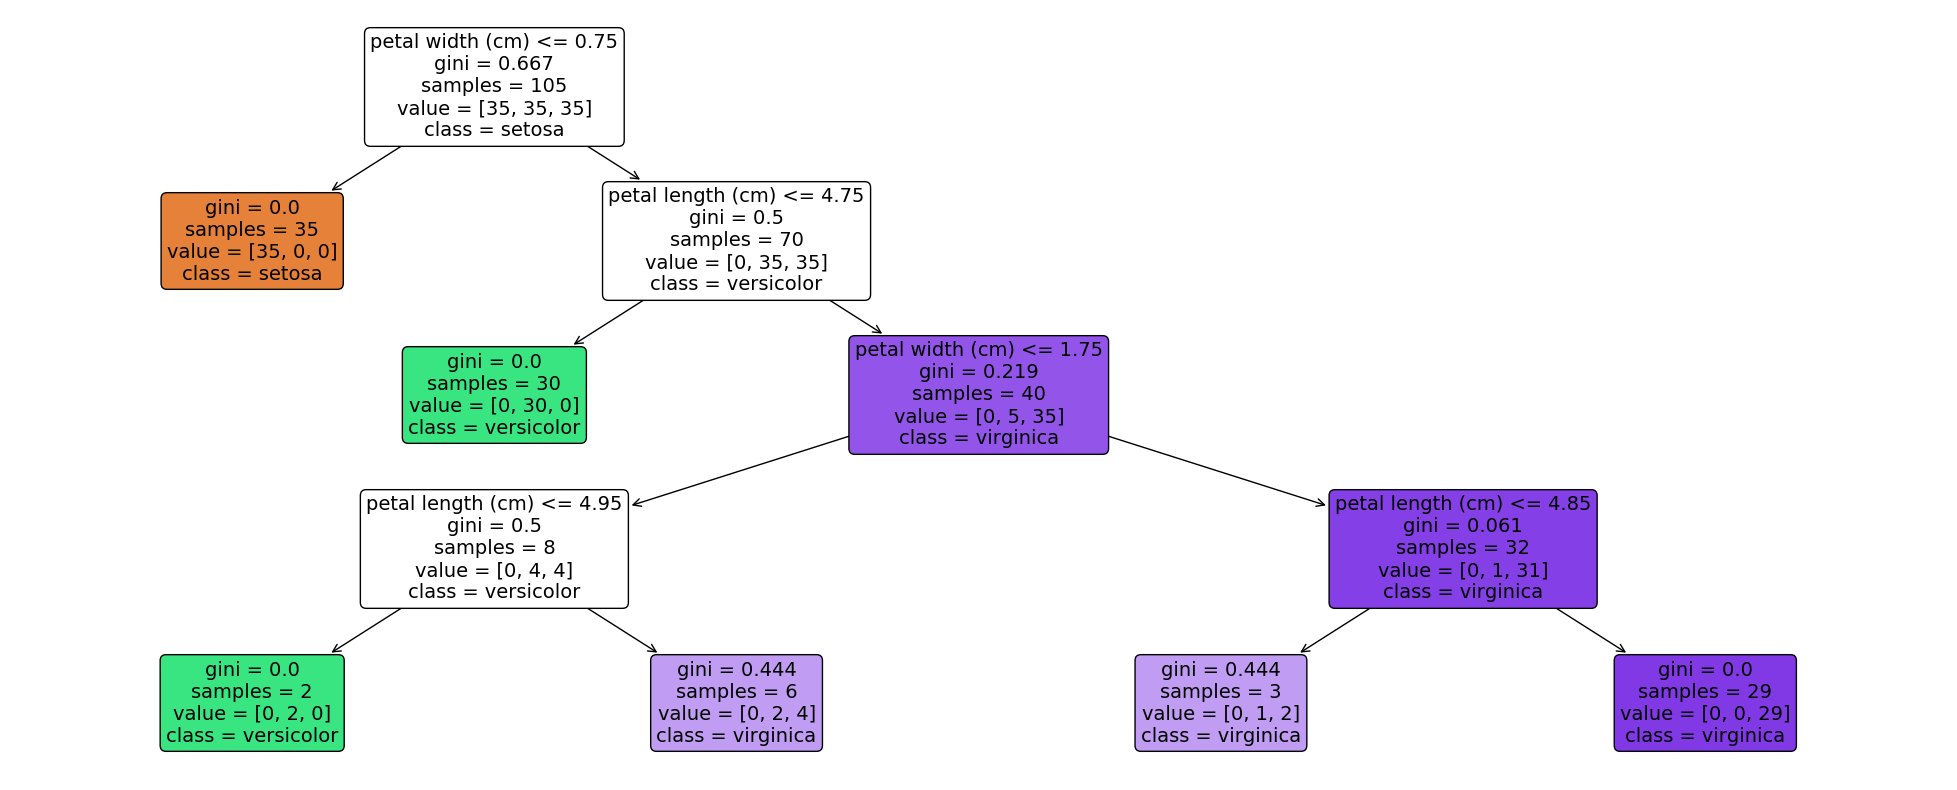

In [20]:
# Plot Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
plot_iris = plot_tree(clf_tree,
                      feature_names=iris.feature_names, 
                      class_names=iris.target_names, 
                      filled=True, 
                      rounded=True, 
                      fontsize=14)

# 2: Cancer Dataset

In [89]:
# Import data

# as_frame = True will load the dataset as a pandas dataframe

# return_X_y = True will return a tuple ('data','target')

cancer_data = datasets.load_breast_cancer(as_frame = True)
cancer_X, cancer_y = datasets.load_breast_cancer(return_X_y = True , as_frame = True)

print(type(cancer_data)) # this is not a dataframe !!
print(type(cancer_X))
print(type(cancer_y))

<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [90]:
# Access the data

cancer_data.DESCR

cancer_data.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [91]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [92]:
cancer_data.filename

'breast_cancer.csv'

In [93]:
# cancer_X and cancer_y should have same length before train - test split
print(cancer_y.shape)
print(cancer_X.shape)

(569,)
(569, 30)


In [94]:
# Create train and test split

features = cancer_X
target = cancer_y

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1, stratify=target)

In [95]:
# Train the model using Decision Tree Classsifier

clf_tree = DecisionTreeClassifier(max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [96]:
# Predict test set labels

y_pred = clf_tree.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [97]:
# Evaluate the Decision Tree

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.94


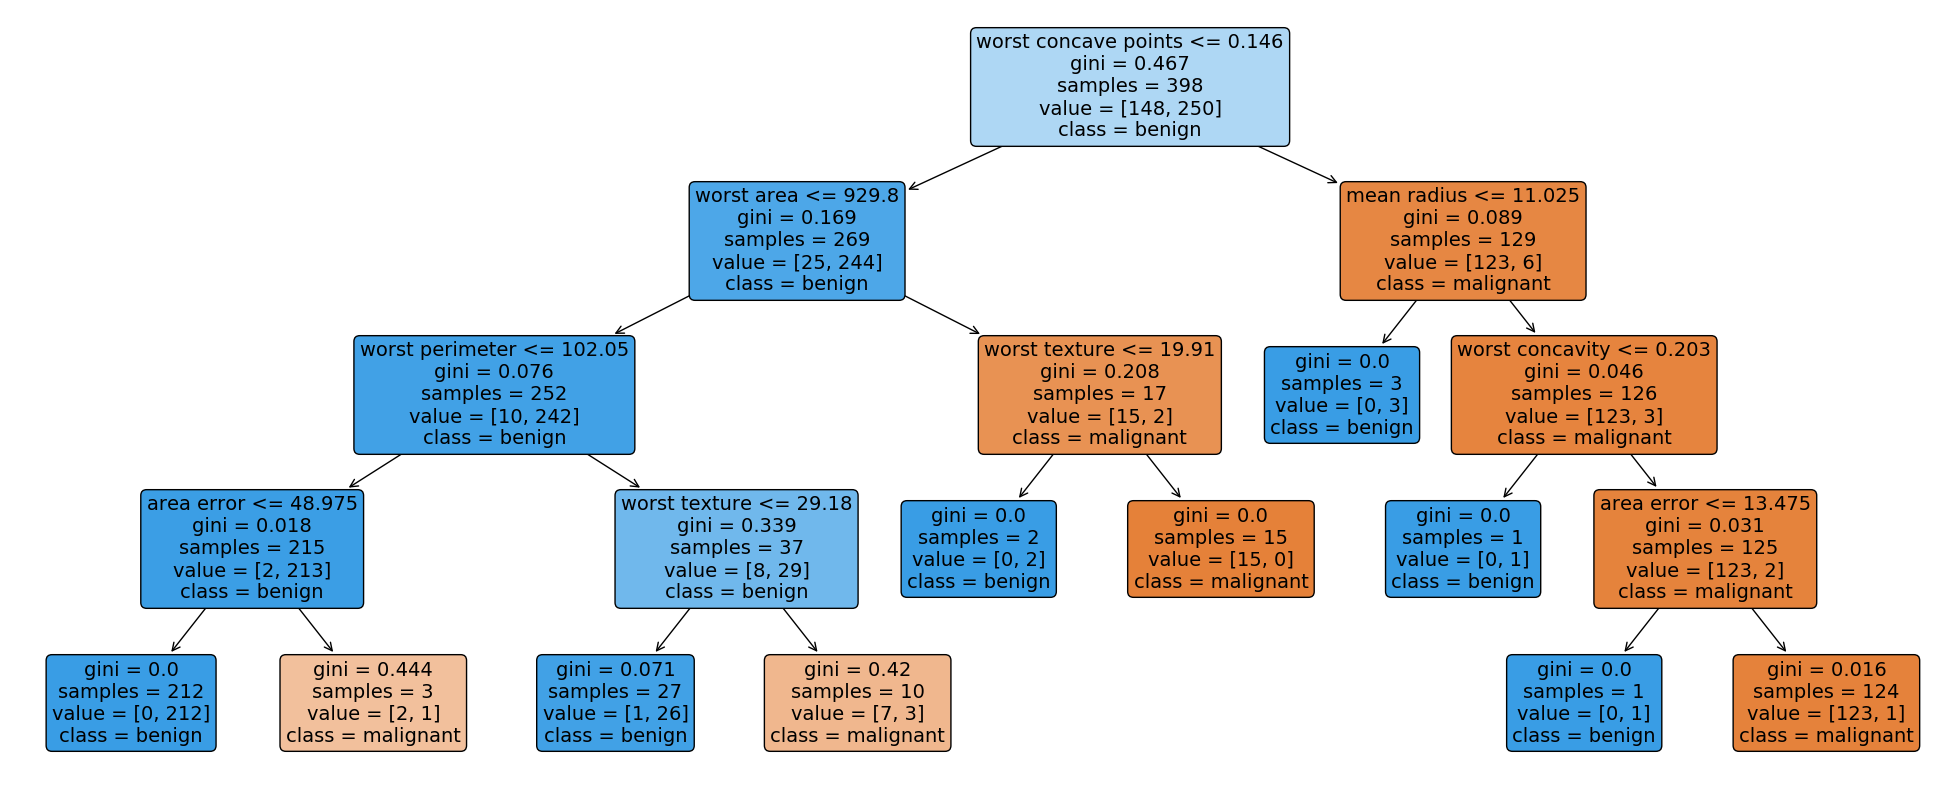

In [98]:
# Plot Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
plot_cancer_data = plot_tree(clf_tree,
                      feature_names=cancer_data.feature_names, 
                      class_names=cancer_data.target_names, 
                      filled=True, 
                      rounded=True, 
                      fontsize=14)